# Supermarket Data Analysis 

In [1]:

import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
#import pandas_profiling
#from pydantic_settings import BaseSettings


## Data Exploration

In [2]:
data=pd.read_csv('supermarket_sales - Sheet1.csv')

data.head().style.set_properties(**{'background-color': 'white',
                                     'color': '#3498db',
                                     'border-color': '#2980b9'})


In [3]:
data.shape

(1000, 17)

In [4]:
data.size

17000

In [5]:
data.info() # for empty and type of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [45]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

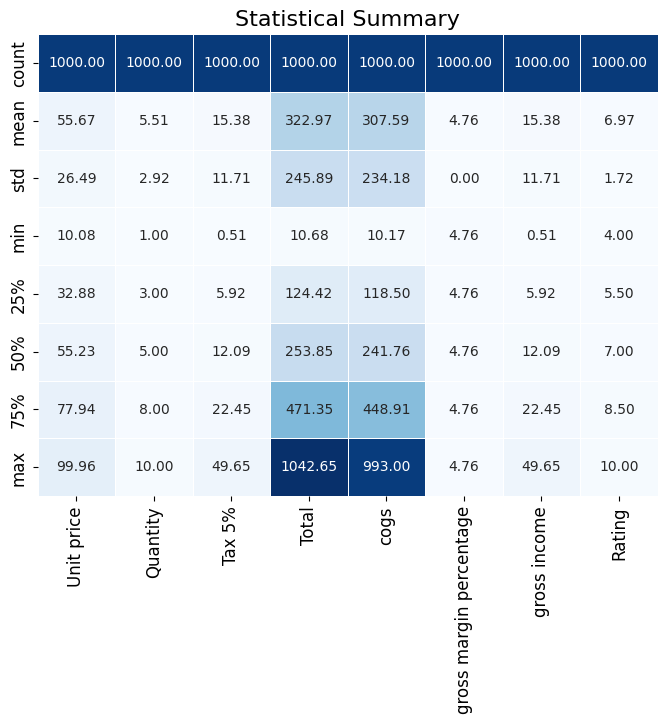

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generating a heatmap using seaborn for a visually appealing style
plt.figure(figsize=(8, 6))
sns.heatmap(data.describe(), cmap='Blues', annot=True, fmt=".2f", linewidths=.5, cbar=False)
plt.title('Statistical Summary', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [8]:
data.describe(include='O').style.background_gradient(cmap='Blues', axis=0)


 Data Cleaning and Preparation

In [9]:
data.nunique() #for number of values of columns

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [10]:
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

data['Year'] = data['Date'].dt.year #Extracting Year from Date

data['Month'] = data['Date'].dt.month #Extracting Month from Date

data['Day'] = data['Date'].dt.day #Extracting Day from Date

In [12]:
data[['Product line','Quantity']].groupby(['Product line']).mean().sort_values(by='Quantity',ascending=False).style.background_gradient(cmap='Blues')

 ## Visualizations (EDA)

In [13]:
import plotly.express as px

fig = px.histogram(data, x='Product line', y='Quantity',
                   color_discrete_sequence=['#2c3e50', '#85C1E9'],  # Dark and light blue colors
                   text_auto=True)

fig.update_layout(title='<b>The Best Selling Product</b>:',
                  title_font={'size': 35, 'family': 'Serif'},
                  paper_bgcolor='#85C1E9',  # Light blue background
                  plot_bgcolor='#85C1E9')   # Light blue plot background

fig.update_yaxes(showgrid=False)

fig.update_traces(marker=dict(line=dict(color='#2c3e50', width=1)),  # Dark blue border color for bars
                  hoverinfo='y+text')  # Show quantity and text on hover

fig.update_layout(hoverlabel=dict(bgcolor='#3498db', font_size=14))  # Hover label styling

fig.show()


In [14]:

fig = px.pie(data, values='Quantity', names='Gender',
             labels={'Gender': 'Gender'}, 
             color_discrete_sequence=px.colors.sequential.Blues_r)  # Reversed Blues palette for dark to light transition

fig.update_traces(textposition='inside',
                  textinfo='percent+label')

fig.update_layout(title='<b>Who Buys more: Men or Women?<b>',
                  titlefont={'size': 35, 'family': 'Serif'},
                  showlegend=True,
                  paper_bgcolor='#66a3d2',  # Light blue background
                  plot_bgcolor='#005a8d',  # Dark blue plot area
                  )

fig.show()


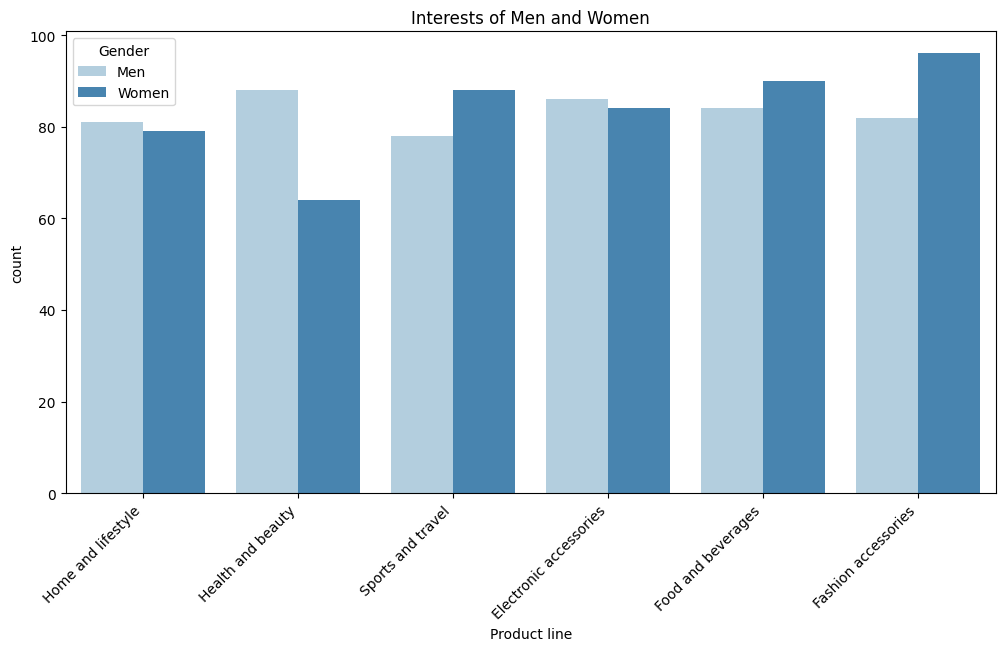

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Product line' is the column containing the interests

# Filter data for men and women
interests_men = data['Product line'][data['Gender'] == 'Male']
interests_women = data['Product line'][data['Gender'] == 'Female']

# Combine interests for both men and women
combined_interests = pd.concat([interests_men, interests_women], keys=['Men', 'Women'], names=['Gender'])

# Create a grouped bar chart with shades of blue
plt.figure(figsize=(12, 6))
sns.countplot(x=combined_interests, hue=combined_interests.index.get_level_values('Gender'), palette='Blues')
plt.title('Interests of Men and Women')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()


In [16]:
fig=px.violin(data,x='Product line',y='gross income',
              color='Product line')

fig.update_layout(title='<b>Lowest Selling Product </b>:',
                  title_font={'size':35,'family': 'Serif'},
                  showlegend=False,
                  paper_bgcolor='#ADD8E6',
                  plot_bgcolor='#ADD8E6')



fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [17]:
fig=px.histogram(data,x='Product line',y='Unit price',
                color='Product line',nbins=5,
                 text_auto=True,opacity=.8)

fig.update_layout(title='<b>Distribution of Product Line according to unit price </b>:',
                  title_font={'size':35,'family': 'Serif'},
                  
                  paper_bgcolor='#ADD8E6',
                  plot_bgcolor='#ADD8E6')



fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [18]:
fig=px.strip(data,x='Branch',y='gross income',
             color='Branch')


fig.update_layout(title='<b>Most Profitable Branch </b>:',
                  title_font={'size':35,'family': 'Serif'},
                  paper_bgcolor='#ADD8E6',
                  plot_bgcolor='#ADD8E6')


fig.update_yaxes(showgrid=False)
fig.show()

In [19]:
data.pivot_table(index='Branch',columns='Gender',values='cogs',aggfunc='count').style.background_gradient(cmap='Blues')

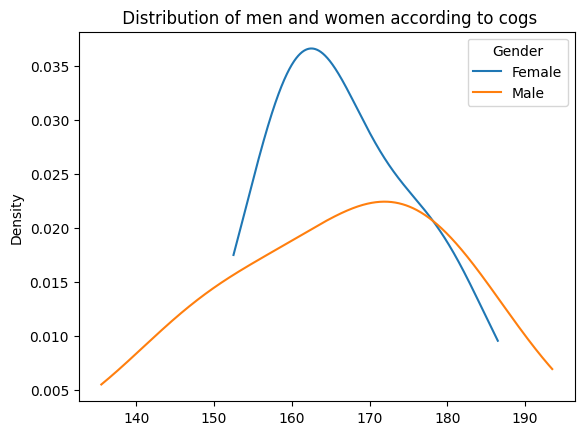

In [20]:
data.pivot_table(index='Branch',columns='Gender',values='cogs',aggfunc='count').plot(kind='kde',title=' Distribution of men and women according to cogs')
plt.show()

In [21]:
data.pivot_table(index='Product line',columns='Branch',values='cogs',aggfunc='max').style.background_gradient(cmap='Blues')

In [22]:
fig=px.treemap(data,path=[px.Constant('Branches'),'Branch','Product line'],
               values='cogs',
               color_discrete_sequence=['#005a8d','#66a3d2','#ADD8E6'])


fig.update_layout(title='<b>Best Selling Products in each Branch</b>:',
                  titlefont={'size': 35,'family': 'Serif'})



fig.show()

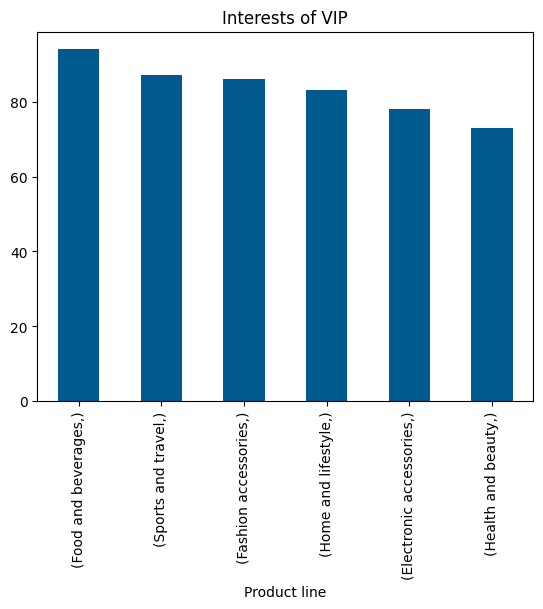

In [23]:
data[['Product line']][(data['Customer type']=='Member')].value_counts().plot(kind='bar',color='#005a8d',title='Interests of VIP')
plt.show()

In [24]:
fig=px.histogram(data,x='Payment',color='Payment')

fig.update_layout(title='<b>Way of Payment </b>:',
                  title_font={'size':35,'family': 'Serif'},
                  paper_bgcolor='#ADD8E6',
                  plot_bgcolor='#ADD8E6')



fig.update_yaxes(showgrid=False)
fig.show()

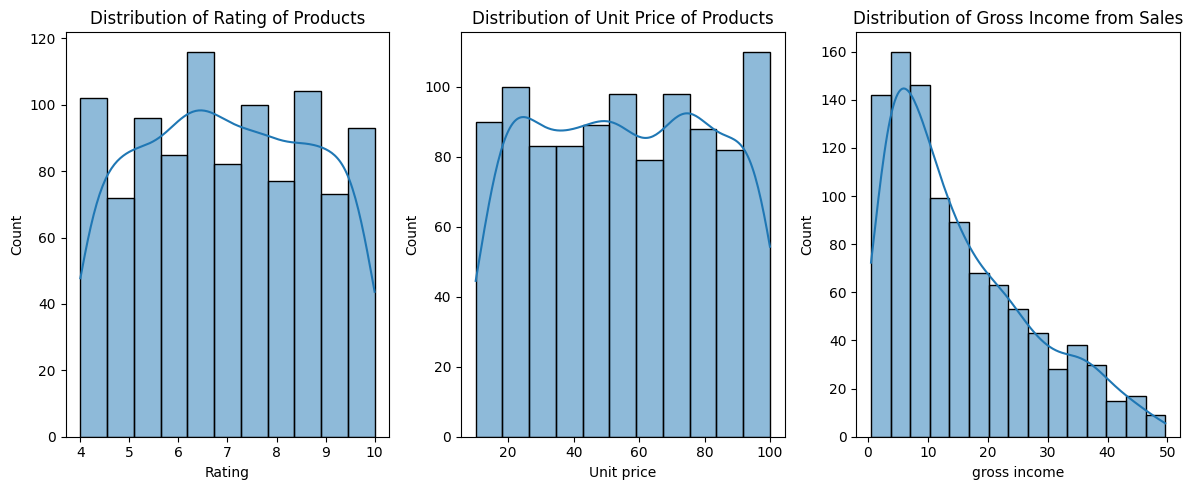

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12,5)) 

sns.histplot(data=data['Rating'],kde=True,ax=axes[0])
axes[0].set_title('Distribution of Rating of Products')
sns.histplot(data=data['Unit price'],kde=True,ax=axes[1])
axes[1].set_title('Distribution of Unit Price of Products')
sns.histplot(data=data['gross income'],kde=True,ax=axes[2])
axes[2].set_title('Distribution of Gross Income from Sales')

fig.tight_layout()
plt.show()

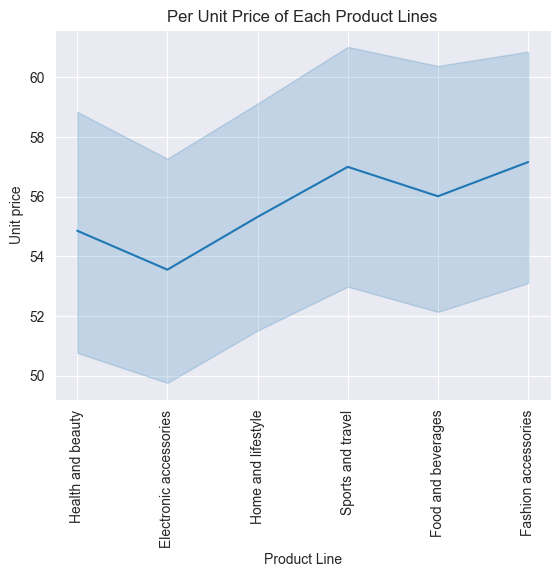

In [26]:
warnings.simplefilter("ignore", UserWarning)
sns.set_style('darkgrid')
ax = sns.lineplot(x=data['Product line'],y=data['Unit price'],data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Product Line')
plt.title('Per Unit Price of Each Product Lines')
plt.show()

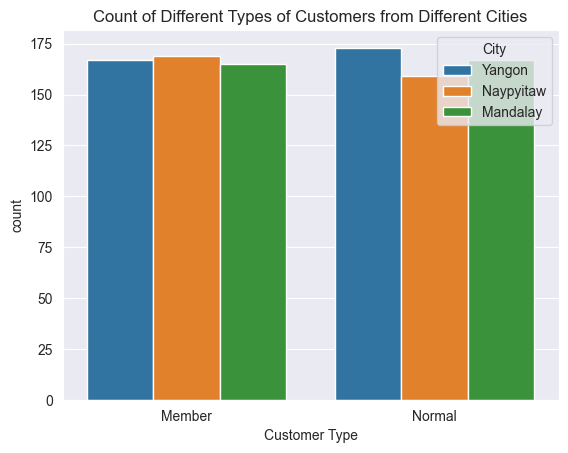

In [27]:
sns.set_style('darkgrid')
ax = sns.countplot(x=data['Customer type'],data=data,hue=data['City'])
plt.xlabel('Customer Type')
plt.title('Count of Different Types of Customers from Different Cities')
plt.legend(title='City',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

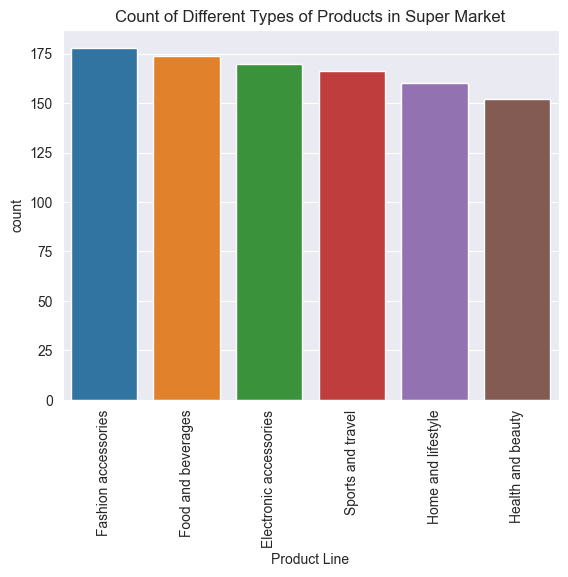

In [28]:
sns.set_style('darkgrid')
ax = sns.countplot(x=data['Product line'],data=data,order=data['Product line'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Product Line')
plt.title('Count of Different Types of Products in Super Market')
plt.show()
warnings.filterwarnings('ignore')

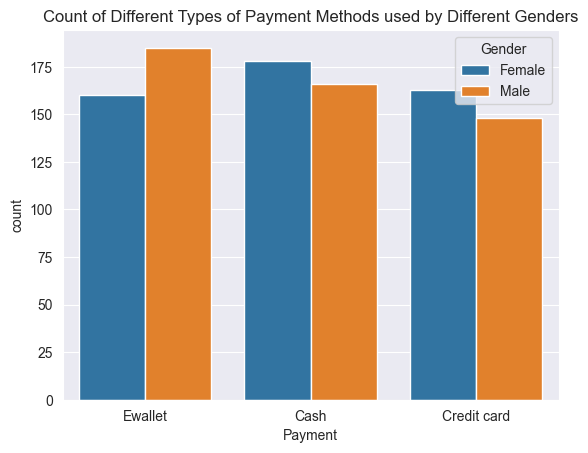

In [29]:
sns.set_style('darkgrid')
ax = sns.countplot(x=data['Payment'],data=data,hue=data['Gender'])
plt.xlabel('Payment')
plt.title('Count of Different Types of Payment Methods used by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

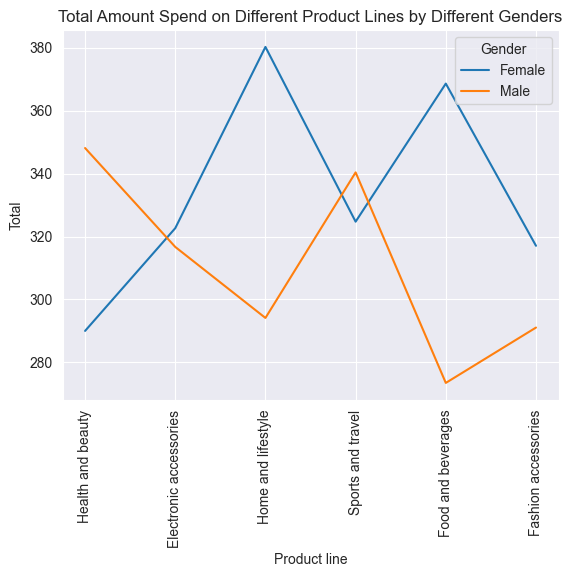

In [30]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=data['Product line'],y=data['Total'],data=data,hue=data['Gender'],err_style=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Total Amount Spend on Different Product Lines by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

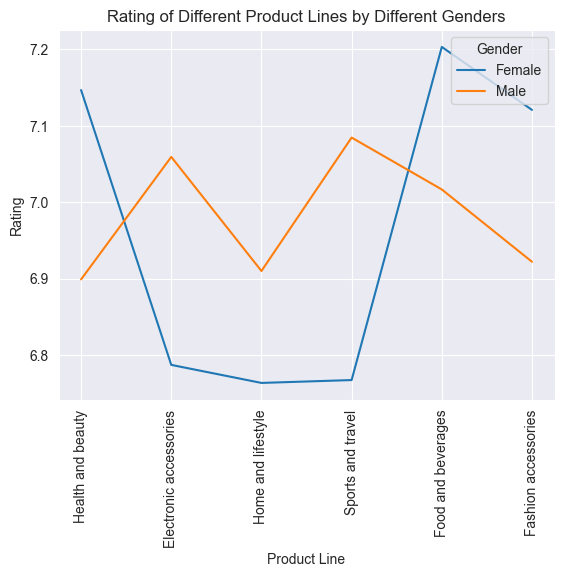

In [31]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=data['Product line'],y=data['Rating'],data=data,hue=data['Gender'],err_style=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel('Product Line')
plt.title('Rating of Different Product Lines by Different Genders')
plt.legend(title='Gender',loc='upper right')
plt.show()
warnings.filterwarnings('ignore')

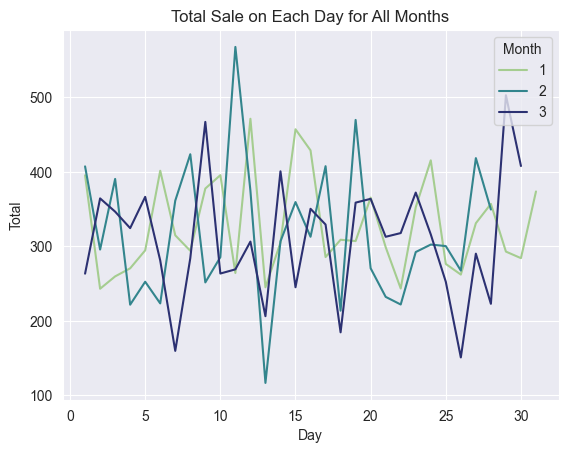

In [32]:
sns.set_style('darkgrid')
ax = sns.lineplot(x=data['Day'],y=data['Total'],hue=data['Month'],err_style=None,palette='crest')
plt.legend(title='Month',loc='upper right')
plt.title('Total Sale on Each Day for All Months')
plt.show()
warnings.filterwarnings('ignore')

In [33]:

fig = px.bar(data, x='Product line', y='Tax 5%', color='Product line', color_discrete_sequence=['#4C72B0'])

# Customize the layout
fig.update_layout(
    title='Taxes on Different Product Lines',
    xaxis=dict(title='Product Line'),
    yaxis=dict(title='Tax 5%'),
    showlegend=False,  # Turn off legend for better space utilization
)

# Remove marker lines
fig.update_traces(marker_line_width=0)

# Add interactivity
fig.update_layout(hovermode='x')  # Show tooltips when hovering over bars

# Show the plot
fig.show()


## Data Encoding

In [34]:
LE=LabelEncoder()

categories=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for label in categories:
    data[label]=LE.fit_transform(data[label])

In [35]:
import plotly.express as px

# Select only numeric columns excluding 'Gross margin percentage'
numeric_data = data.select_dtypes(include=['float64', 'int64']).drop(columns=['gross margin percentage'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Create an interactive heatmap with Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(color='Correlation Coefficient'),
                color_continuous_scale='Blues',
                title='Correlation Heatmap',
                width=800, height=600)



# Show the plot
fig.show()


## Normalization

In [36]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns for normalization
numerical_cols = ['Quantity', 'Unit price', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

# Use StandardScaler for normalization
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


 ## Association Rule Mining


In [39]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
import warnings 
warnings.filterwarnings('ignore')
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df['Product line'] = df['Product line'].str.strip()
df.dropna(axis=0, subset=['Invoice ID'], inplace=True)
df['Invoice ID'] = df['Invoice ID'].astype('str')
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

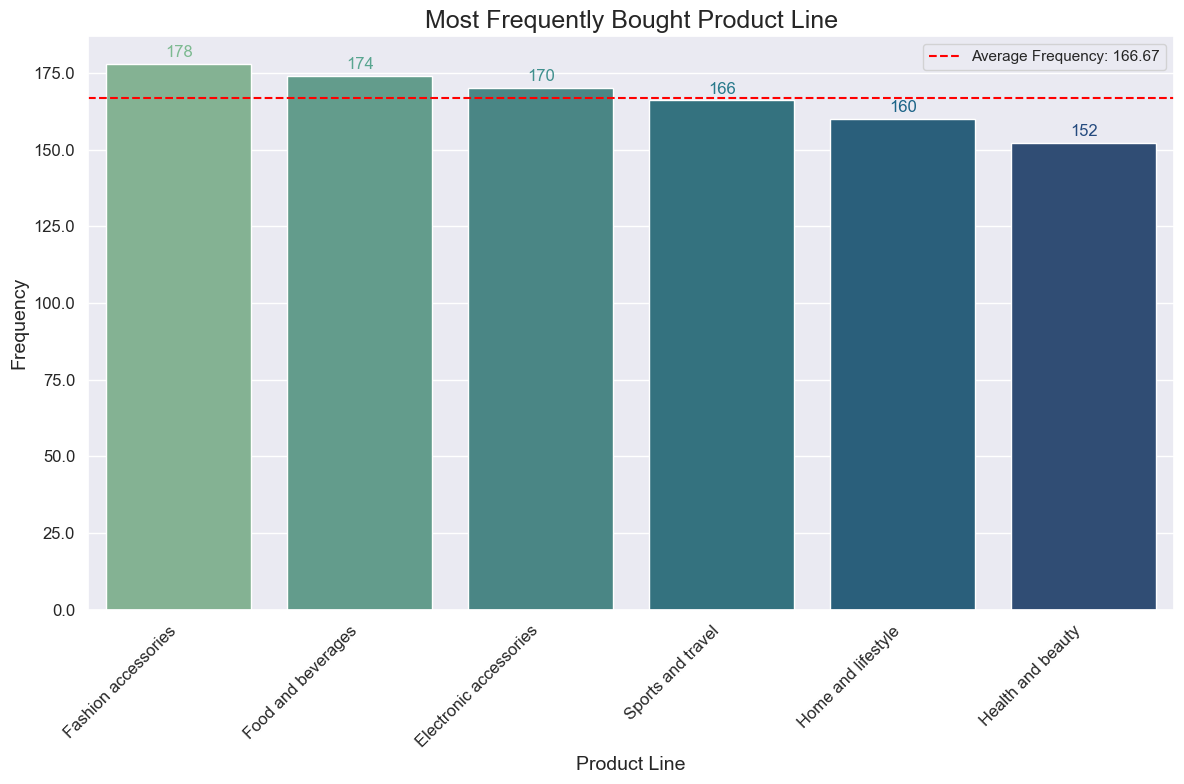

In [40]:
import mplcursors

# Extract the 'Product line' column
product_line_counts = df['Product line'].value_counts()

# Set a dark seaborn style
sns.set(style="darkgrid")

# Create a color gradient
color_palette = sns.color_palette("crest", n_colors=len(product_line_counts))

# Create a bar plot with seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=product_line_counts.index, y=product_line_counts.values, palette=color_palette)

# Customize the plot
ax.set_title('Most Frequently Bought Product Line', fontsize=18)
ax.set_xlabel('Product Line', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)

# Add data labels
for p, color in zip(ax.patches, color_palette):
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color=color, xytext=(0, 5),
                textcoords='offset points')

# Add a horizontal line for the average frequency
avg_frequency = product_line_counts.mean()
ax.axhline(y=avg_frequency, color='red', linestyle='--', label=f'Average Frequency: {avg_frequency:.2f}')
ax.legend()

# Use mplcursors to add interactive labels
mplcursors.cursor(hover=True)

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
duplicate_invoice_ids = df[df.duplicated(subset='Invoice ID')]

# Print the duplicate invoice IDs
if not duplicate_invoice_ids.empty:
    print("Duplicate Invoice IDs:")
    print(duplicate_invoice_ids['Invoice ID'].tolist())
else:
    print("No duplicate invoice IDs found.")

No duplicate invoice IDs found.


Since there is only 1 product in each invoice, Association among products cannot be determined based on what was purchased together. Thus, a workaround has been applied below where the combination of City and Date are used to group Products to find associations.

In [42]:
basket = (df
          .groupby(['City','Date', 'Product line'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index(['City','Date']))
basket

Product line        Electronic accessories  Fashion accessories  \
City     Date                                                     
Mandalay 1/1/2019                      6.0                  0.0   
         1/10/2019                     4.0                  7.0   
         1/12/2019                     8.0                 10.0   
         1/13/2019                     0.0                  2.0   
         1/14/2019                     0.0                  4.0   
...                                    ...                  ...   
Yangon   3/5/2019                      3.0                  2.0   
         3/6/2019                      9.0                  0.0   
         3/7/2019                      0.0                  0.0   
         3/8/2019                      1.0                  5.0   
         3/9/2019                      0.0                  8.0   

Product line        Food and beverages  Health and beauty  Home and lifestyle  \
City     Date                                                                   
Mandalay 1/1/2019                 18.0                0.0                 0.0   
         1/10/2019                 0.0                0.0                 0.0   
         1/12/2019                 0.0                3.0                 7.0   
         1/13/2019                 2.0                0.0                 0.0   
         1/14/2019                12.0                1.0                 0.0   
...                                ...                ...                 ...   
Yangon   3/5/2019                  0.0                0.0                 0.0   
         3/6/2019                  0.0                1.0                 0.0   
         3/7/2019                  0.0                9.0                 5.0   
         3/8/2019                  0.0                0.0                16.0   
         3/9/2019                  5.0               14.0                 0.0   

Product line        Sports and travel  
City     Date                          
Mandalay 1/1/2019                 0.0  
         1/10/2019                8.0  
         1/12/2019                6.0  
         1/13/2019                6.0  
         1/14/2019                1.0  
...                               ...  
Yangon   3/5/2019                 0.0  
         3/6/2019                16.0  
         3/7/2019                 0.0  
         3/8/2019                 0.0  
         3/9/2019                12.0  

[263 rows x 6 columns]

In [43]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
basket_sets

Product line        Electronic accessories  Fashion accessories  \
City     Date                                                     
Mandalay 1/1/2019                        1                    0   
         1/10/2019                       1                    1   
         1/12/2019                       1                    1   
         1/13/2019                       0                    1   
         1/14/2019                       0                    1   
...                                    ...                  ...   
Yangon   3/5/2019                        1                    1   
         3/6/2019                        1                    0   
         3/7/2019                        0                    0   
         3/8/2019                        1                    1   
         3/9/2019                        0                    1   

Product line        Food and beverages  Health and beauty  Home and lifestyle  \
City     Date                                                                   
Mandalay 1/1/2019                    1                  0                   0   
         1/10/2019                   0                  0                   0   
         1/12/2019                   0                  1                   1   
         1/13/2019                   1                  0                   0   
         1/14/2019                   1                  1                   0   
...                                ...                ...                 ...   
Yangon   3/5/2019                    0                  0                   0   
         3/6/2019                    0                  1                   0   
         3/7/2019                    0                  1                   1   
         3/8/2019                    0                  0                   1   
         3/9/2019                    1                  1                   0   

Product line        Sports and travel  
City     Date                          
Mandalay 1/1/2019                   0  
         1/10/2019                  1  
         1/12/2019                  1  
         1/13/2019                  1  
         1/14/2019                  1  
...                               ...  
Yangon   3/5/2019                   0  
         3/6/2019                   1  
         3/7/2019                   0  
         3/8/2019                   0  
         3/9/2019                   1  

[263 rows x 6 columns]

In [44]:
frequent_itemsets = apriori(basket_sets, min_support=0.03, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()


antecedents               consequents  antecedent support  \
0  (Electronic accessories)     (Fashion accessories)            0.486692   
1     (Fashion accessories)  (Electronic accessories)            0.528517   
2       (Sports and travel)  (Electronic accessories)            0.501901   
3  (Electronic accessories)       (Sports and travel)            0.486692   
4     (Fashion accessories)      (Food and beverages)            0.528517   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.528517  0.273764    0.562500  1.064299  0.016539    1.077675   
1            0.486692  0.273764    0.517986  1.064299  0.016539    1.064923   
2            0.486692  0.254753    0.507576  1.042910  0.010482    1.042410   
3            0.501901  0.254753    0.523438  1.042910  0.010482    1.045191   
4            0.479087  0.258555    0.489209  1.021126  0.005349    1.019815   

   zhangs_metric  
0       0.117695  
1       0.128136  
2       0.082602  
3       0.080155  
4       0.043880

#### Rules extracted from Apriori algorithms having lift >1 and confidence greater than 80% are as follows:

In [45]:
rules=rules[ (rules['lift'] >= 1) &
      (rules['confidence'] >= 0.8) ]
rules

antecedents            consequents  \
244  (Electronic accessories, Health and beauty, Ho...  (Fashion accessories)   
270  (Sports and travel, Health and beauty, Food an...  (Fashion accessories)   
299  (Sports and travel, Food and beverages, Fashio...   (Home and lifestyle)   
330  (Electronic accessories, Health and beauty, Ho...    (Sports and travel)   
358  (Sports and travel, Health and beauty, Food an...   (Home and lifestyle)   
359  (Electronic accessories, Health and beauty, Ho...    (Sports and travel)   
383  (Sports and travel, Health and beauty, Home an...  (Fashion accessories)   

     antecedent support  consequent support   support  confidence      lift  \
244            0.038023            0.528517  0.030418    0.800000  1.513669   
270            0.038023            0.528517  0.034221    0.900000  1.702878   
299            0.064639            0.471483  0.053232    0.823529  1.746679   
330            0.049430            0.501901  0.045627    0.923077  1.839161   
358            0.038023            0.471483  0.030418    0.800000  1.696774   
359            0.038023            0.501901  0.030418    0.800000  1.593939   
383            0.041825            0.528517  0.038023    0.909091  1.720078   

     leverage  conviction  zhangs_metric  
244  0.010323    2.357414       0.352767  
270  0.014125    4.714829       0.429073  
299  0.022756    2.994930       0.457027  
330  0.020819    6.475285       0.480000  
358  0.012491    2.642586       0.426877  
359  0.011335    2.490494       0.387352  
383  0.015918    5.186312       0.436905

In [46]:
import plotly.express as px
import pandas as pd


# Convert sets to lists for Plotly serialization
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x))

# Create the scatter plot
fig = px.scatter(rules, x='support', y='confidence', size='lift', color='lift',
                 hover_data=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# Customize the plot
fig.update_layout(
    title='Association Rules Visualization',
    xaxis_title='Support',
    yaxis_title='Confidence',
    legend_title='Lift',
    hovermode='closest',  # Show tooltips on hover
)

# Add rule names as annotations
for i, row in rules.iterrows():
    fig.add_annotation(
        x=row['support'],
        y=row['confidence'],
        text=f"Rule {i+1}",
        showarrow=False,
        font=dict(size=8),
    )

# Show the plot
fig.show()

## FP Growth Algorithm


#### Rules extracted from FP growth algorithm having lift >1 and confidence greater than 80% are as follows:

In [47]:
frequent_itemsets_fpgrowth = fpgrowth(basket_sets, min_support=0.03, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)
rules_fpgrowth[ (rules_fpgrowth['lift'] >= 1) &
      (rules['confidence'] >= 0.8) ]

antecedents  \
244            (Health and beauty, Home and lifestyle)   
270                           (Electronic accessories)   
299        (Electronic accessories, Health and beauty)   
330  (Sports and travel, Health and beauty, Fashion...   
358  (Sports and travel, Health and beauty, Home an...   
359  (Sports and travel, Health and beauty, Electro...   
383  (Health and beauty, Home and lifestyle, Fashio...   

                                           consequents  antecedent support  \
244                              (Fashion accessories)            0.186312   
270  (Sports and travel, Health and beauty, Home an...            0.486692   
299  (Sports and travel, Home and lifestyle, Fashio...            0.193916   
330           (Home and lifestyle, Food and beverages)            0.133080   
358       (Electronic accessories, Food and beverages)            0.091255   
359           (Home and lifestyle, Food and beverages)            0.102662   
383       (Electronic accessories, Food and beverages)            0.098859   

     consequent support   support  confidence      lift  leverage  conviction  \
244            0.528517  0.098859    0.530612  1.003964  0.000390    1.004464   
270            0.091255  0.060837    0.125000  1.369792  0.016424    1.038566   
299            0.148289  0.045627    0.235294  1.586727  0.016872    1.113776   
330            0.209125  0.038023    0.285714  1.366234  0.010192    1.107224   
358            0.224335  0.030418    0.333333  1.485876  0.009947    1.163498   
359            0.209125  0.030418    0.296296  1.416835  0.008949    1.123874   
383            0.224335  0.030418    0.307692  1.371578  0.008241    1.120406   

     zhangs_metric  
244       0.004853  
270       0.525926  
299       0.458726  
330       0.309211  
358       0.359833  
359       0.327860  
383       0.300633

In [48]:
import time
import psutil


# Function to measure memory usage
def get_memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 ** 2)  # Memory usage in MB

# Apriori Algorithm
start_time_apriori = time.time()
frequent_itemsets_apriori = apriori(basket_sets, min_support=0.03, use_colnames=True)
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)
end_time_apriori = time.time()

# Measure memory usage after Apriori
memory_usage_apriori = get_memory_usage()

# FP-Growth Algorithm
# Convert DataFrame to boolean type to address the deprecation warning
#my_basket_sets_bool = my_basket_sets.astype(bool)
start_time_fpgrowth = time.time()
frequent_itemsets_fpgrowth = fpgrowth(basket_sets, min_support=0.03, use_colnames=True)
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)
end_time_fpgrowth = time.time()

# Measure memory usage after FP-Growth
memory_usage_fpgrowth = get_memory_usage()

# Print execution time
print("Apriori Execution Time: {:.4f} seconds".format(end_time_apriori - start_time_apriori))
print("FP-Growth Execution Time: {:.4f} seconds".format(end_time_fpgrowth - start_time_fpgrowth))

# Print memory usage
print("Memory Usage - Apriori: {:.2f} MB".format(memory_usage_apriori))
print("Memory Usage - FP-Growth: {:.2f} MB".format(memory_usage_fpgrowth))

Apriori Execution Time: 0.0117 seconds
FP-Growth Execution Time: 0.0067 seconds
Memory Usage - Apriori: 260.79 MB
Memory Usage - FP-Growth: 260.98 MB


#### Apriori is a more time complex and high memory consuming algorithm as compared to FP growth since it iterates over entire dataset. In our case since the number of combinations are very small we don't see a very significant difference in memory consumption but there is a significant difference between time consumption of apriori as compared to FP growth algorithm.

## Tracking Changes in Itemsets Over Time:

In [49]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Group by 'Date' and 'Product line' to get daily itemsets
time_basket = (df.groupby(['Date', 'Product line'])['Quantity']
               .sum().unstack().reset_index().fillna(0)
               .set_index('Date'))

# Apply the encode_units function
time_basket_sets = time_basket.applymap(encode_units)


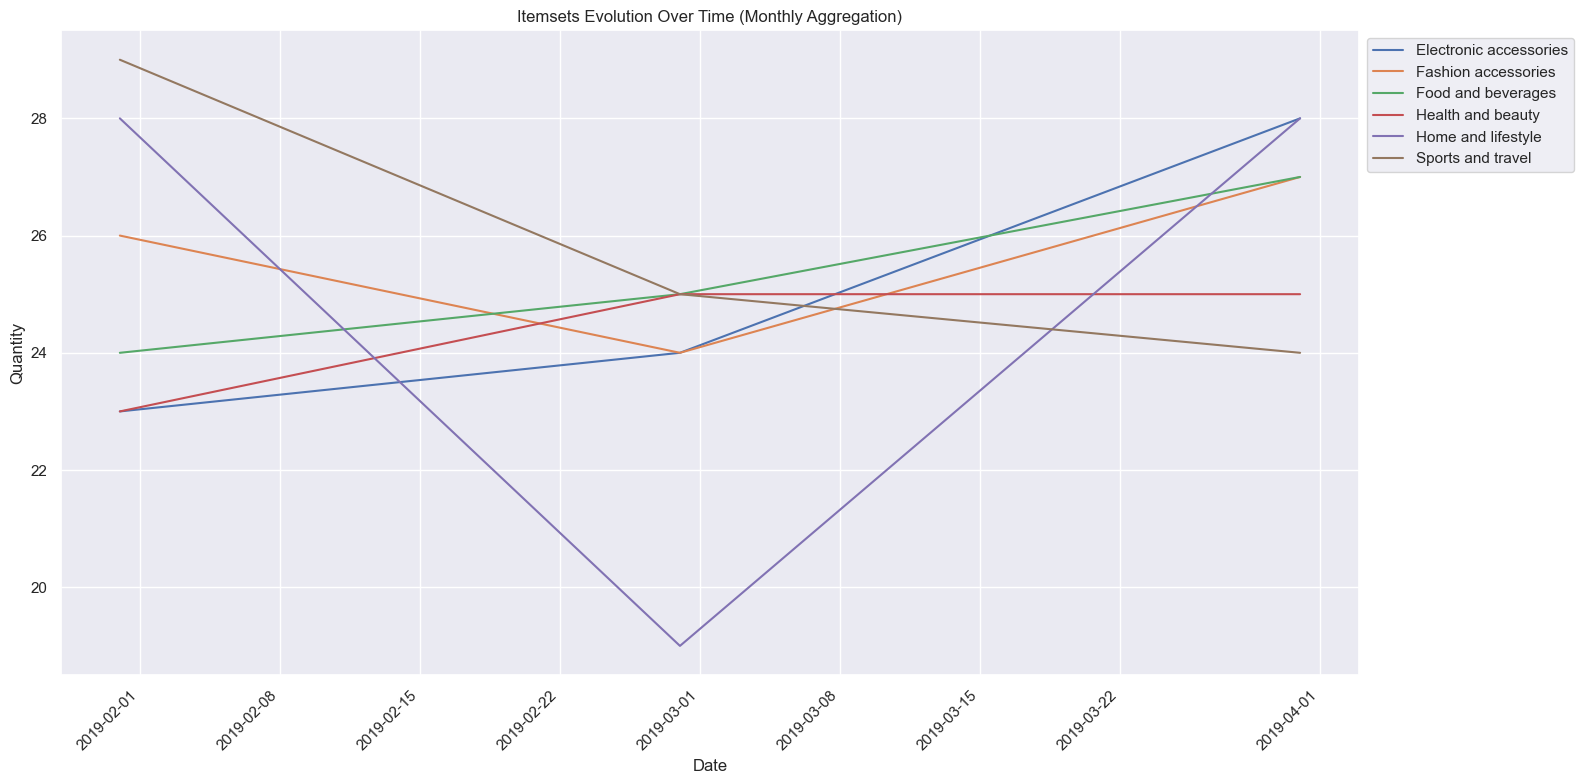

In [50]:
# Resample the time series data to monthly frequency
monthly_time_basket = time_basket_sets.resample('M').sum()

# Plot the evolution of itemsets over time using a line plot
plt.figure(figsize=(16, 8))
for product_line in monthly_time_basket.columns:
    plt.plot(monthly_time_basket.index, monthly_time_basket[product_line], label=product_line)

# Customize the plot
plt.title('Itemsets Evolution Over Time (Monthly Aggregation)')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Monthly Total Sales Analysis by Product Category

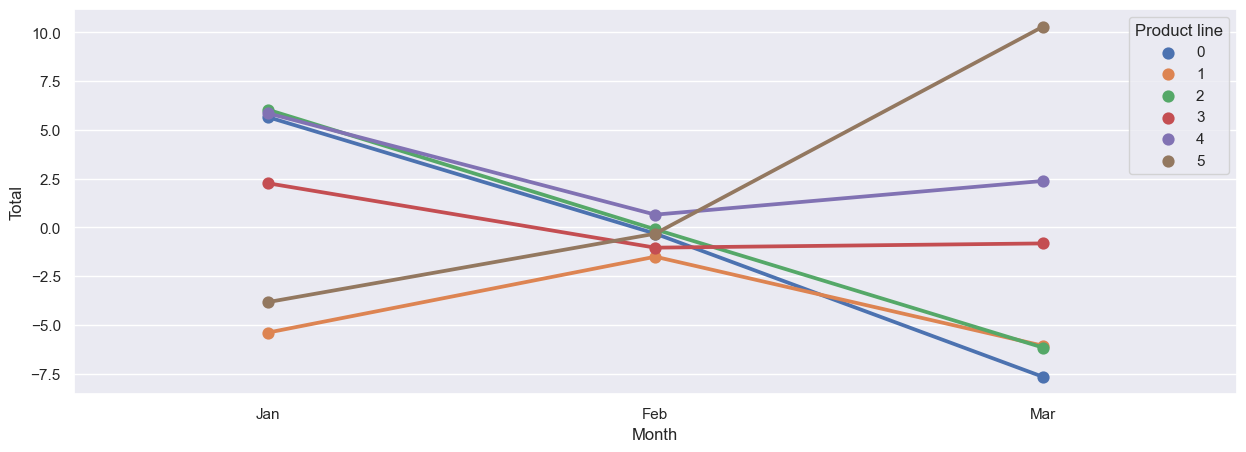

In [49]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = data.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[["Total", 'Month',
                'Product line']].groupby(["Product line", "Month"]).sum().reset_index().sort_values(by=['Total'],
                                                                                                    ascending=True)
df = df.iloc[df['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="Total", data=df, hue="Product line")
plt.show()

Daily Total Sales Analysis by Gender

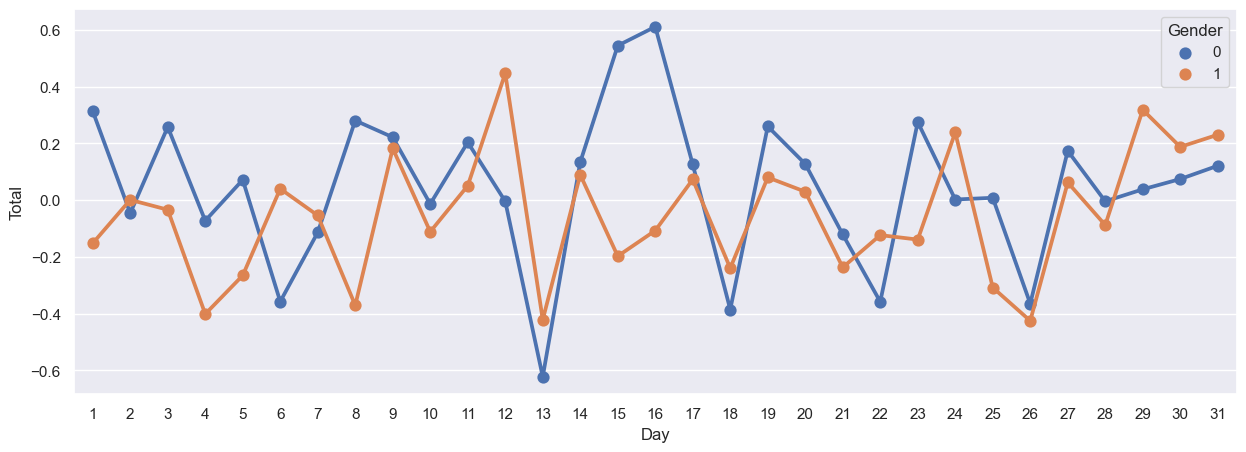

In [50]:
df = data[["Total",'Day', "Gender"]].groupby(["Day",
                                              "Gender"]).mean().reset_index().sort_values(by=['Day'], ascending=True)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Day', y="Total", data=df, hue="Gender")
plt.show()

Daily Sales Analysis of Product Categories

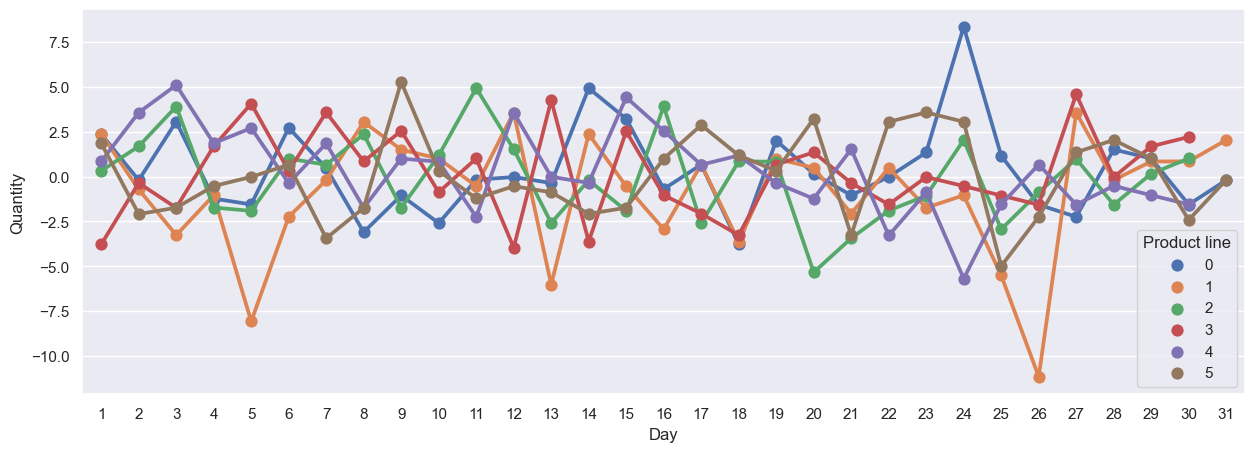

In [51]:
df = data[["Quantity",
           "Product line", "Day"]].groupby(["Day",
                                            "Product line"]).sum().reset_index().sort_values(by=["Day",
                                                                                                 "Quantity"], ascending=True)
f,ax=plt.subplots(figsize=(15,5))
sns.pointplot(x='Day', y="Quantity", data=df, hue="Product line")
plt.show()

#### It is evident from the chart above that the sale of all itemsets except "food, beverages"  and "health,beauty" declined at the beginning of March but started returning to normal sales gradually 

In [51]:
# Apply Apriori algorithm with varying min_support to identify patterns over time
min_support_values = [0.02, 0.03, 0.04]  # Adjust as needed
evolving_patterns = {}

for min_support in min_support_values:
    frequent_itemsets = apriori(time_basket_sets, min_support=min_support, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    evolving_patterns[min_support] = rules


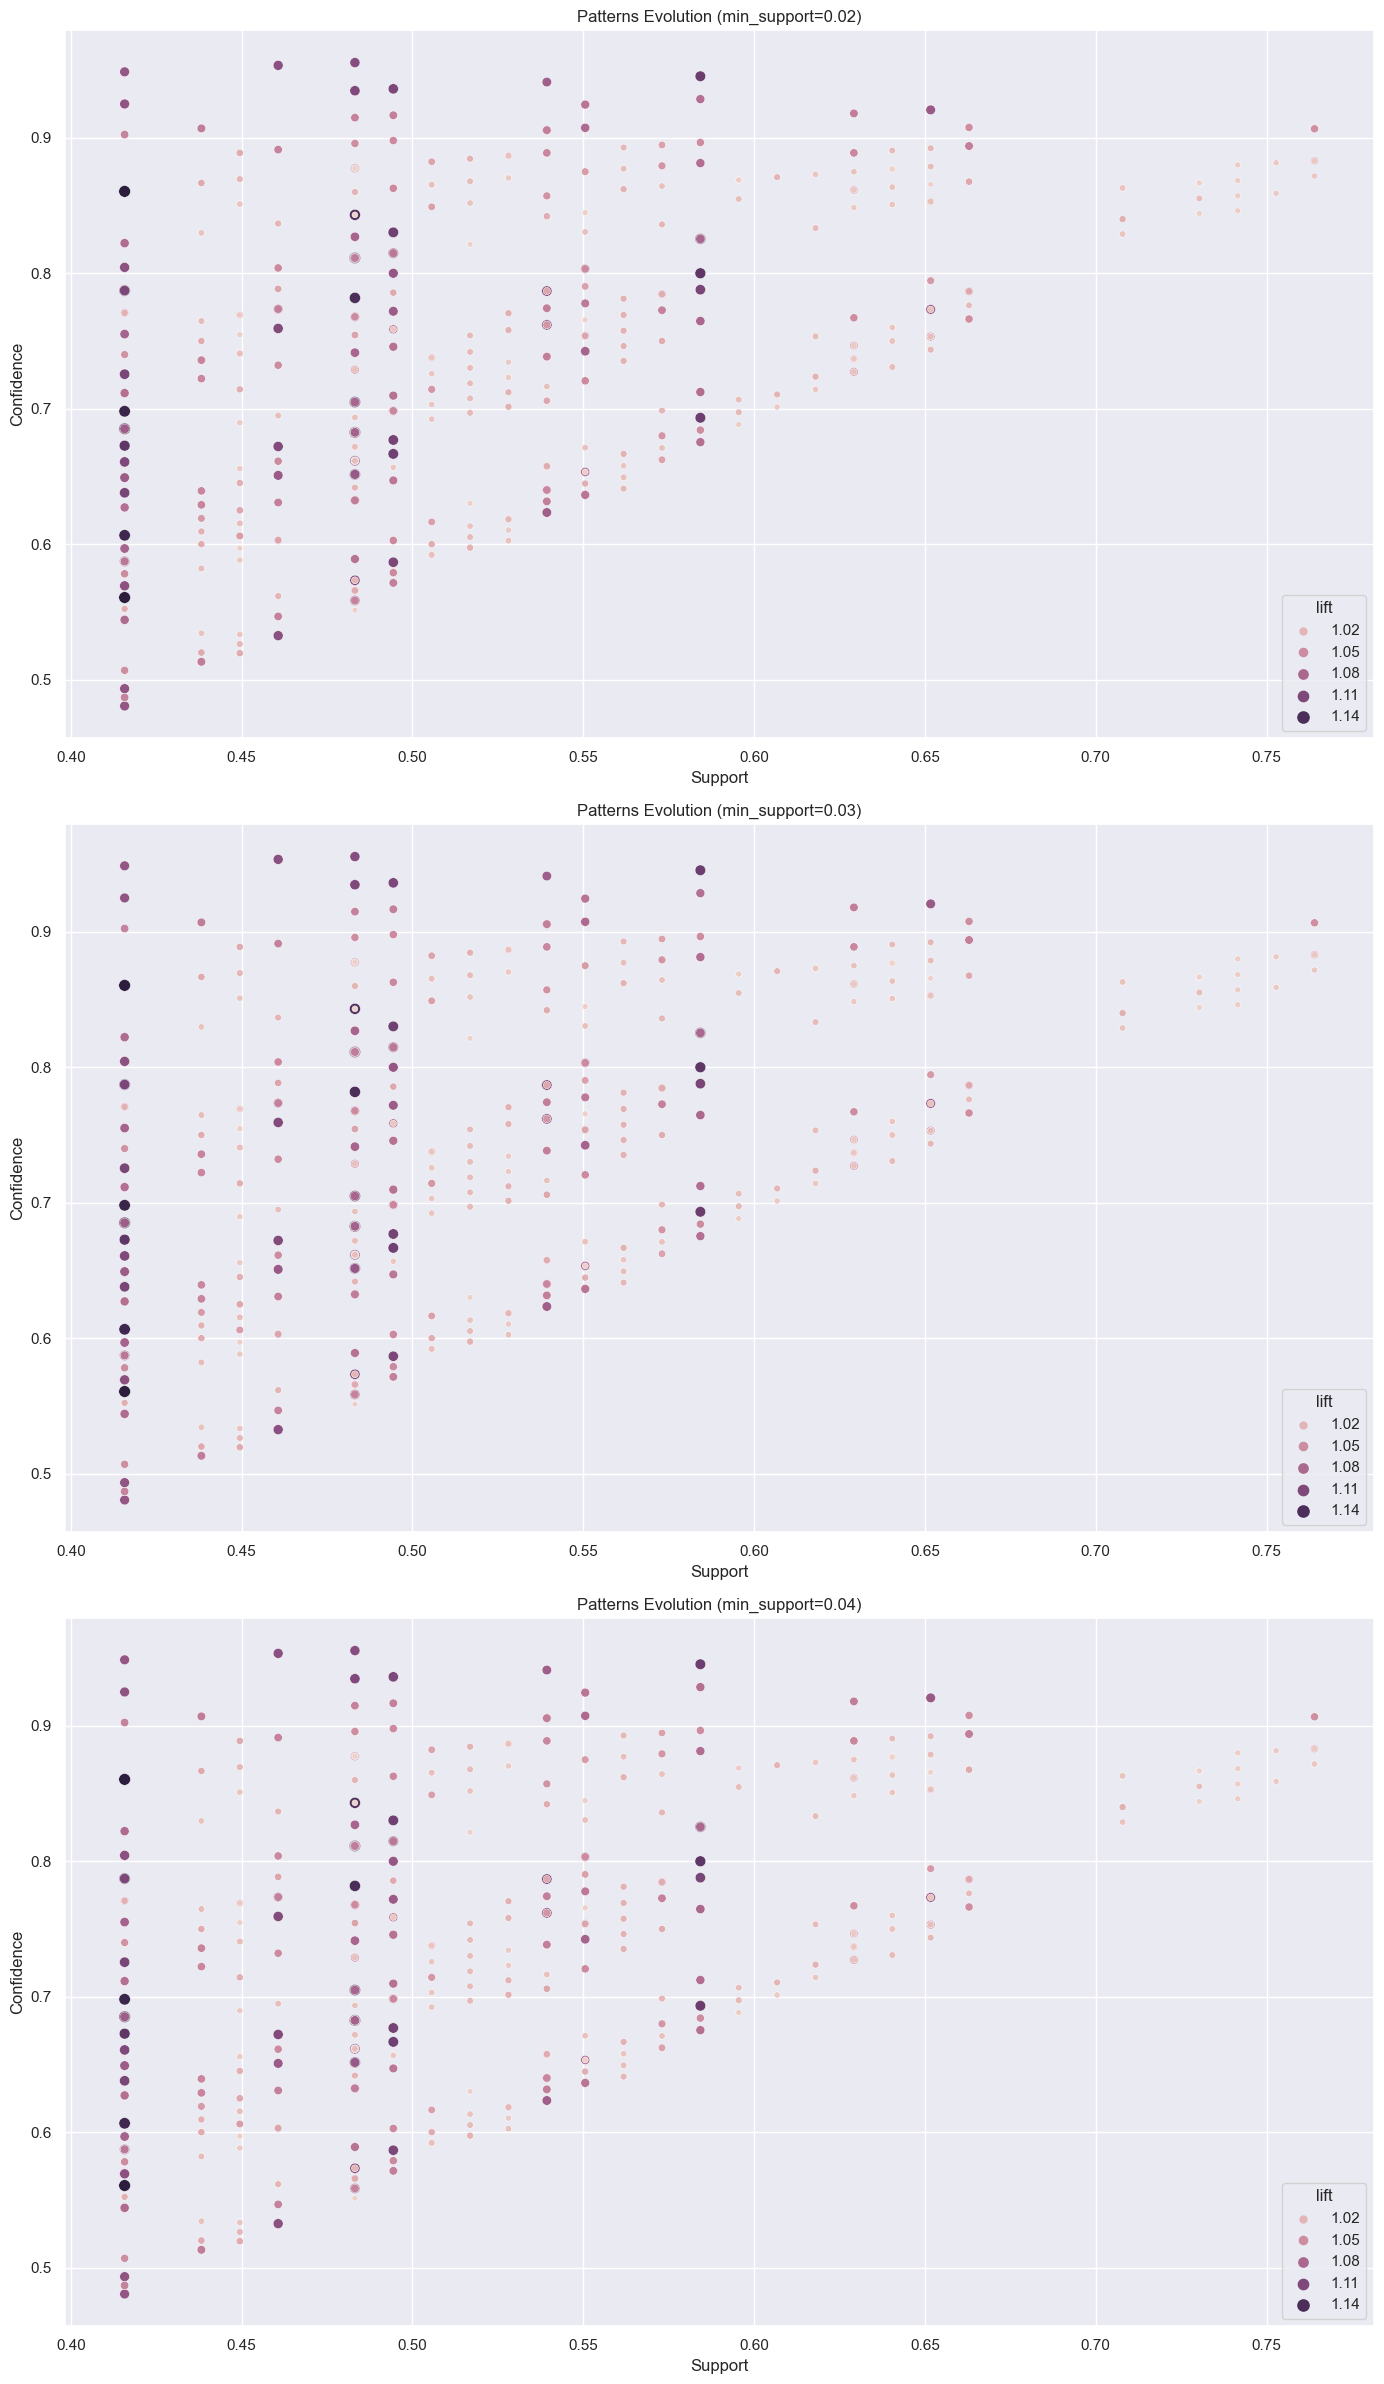

In [52]:
# Visualize how patterns evolve over time
fig, axes = plt.subplots(nrows=len(min_support_values), figsize=(14, 8 * len(min_support_values)))

for i, min_support in enumerate(min_support_values):
    sns.scatterplot(x='support', y='confidence', size='lift', hue='lift',
                    data=evolving_patterns[min_support], ax=axes[i])
    axes[i].set_title(f'Patterns Evolution (min_support={min_support})')
    axes[i].set_xlabel('Support')
    axes[i].set_ylabel('Confidence')

plt.tight_layout()
plt.show()


## Sequential Pattern Mining

In [53]:
# Import necessary libraries
from prefixspan import PrefixSpan

# Assume df is your DataFrame with the specified columns

# Extract relevant columns for sequential pattern mining
sequences = df[['City', 'Date', 'Product line']]

# Convert the data to a list of lists (sequences)
sequences_list = sequences.groupby(['City', 'Date'])['Product line'].apply(list).tolist()

# Set the minimum support threshold
min_support = 0.5

# Perform Sequential Pattern Mining using PrefixSpan
prefix_span = PrefixSpan(sequences_list)
patterns = prefix_span.frequent(min_support)

# Display the first 5 discovered patterns
for i, pattern in enumerate(patterns[:5]):
    print(f"Pattern {i + 1}: {pattern}")



Pattern 1: (128, ['Electronic accessories'])
Pattern 2: (35, ['Electronic accessories', 'Food and beverages'])
Pattern 3: (10, ['Electronic accessories', 'Food and beverages', 'Food and beverages'])
Pattern 4: (5, ['Electronic accessories', 'Food and beverages', 'Food and beverages', 'Health and beauty'])
Pattern 5: (1, ['Electronic accessories', 'Food and beverages', 'Food and beverages', 'Health and beauty', 'Health and beauty'])


## Clustering


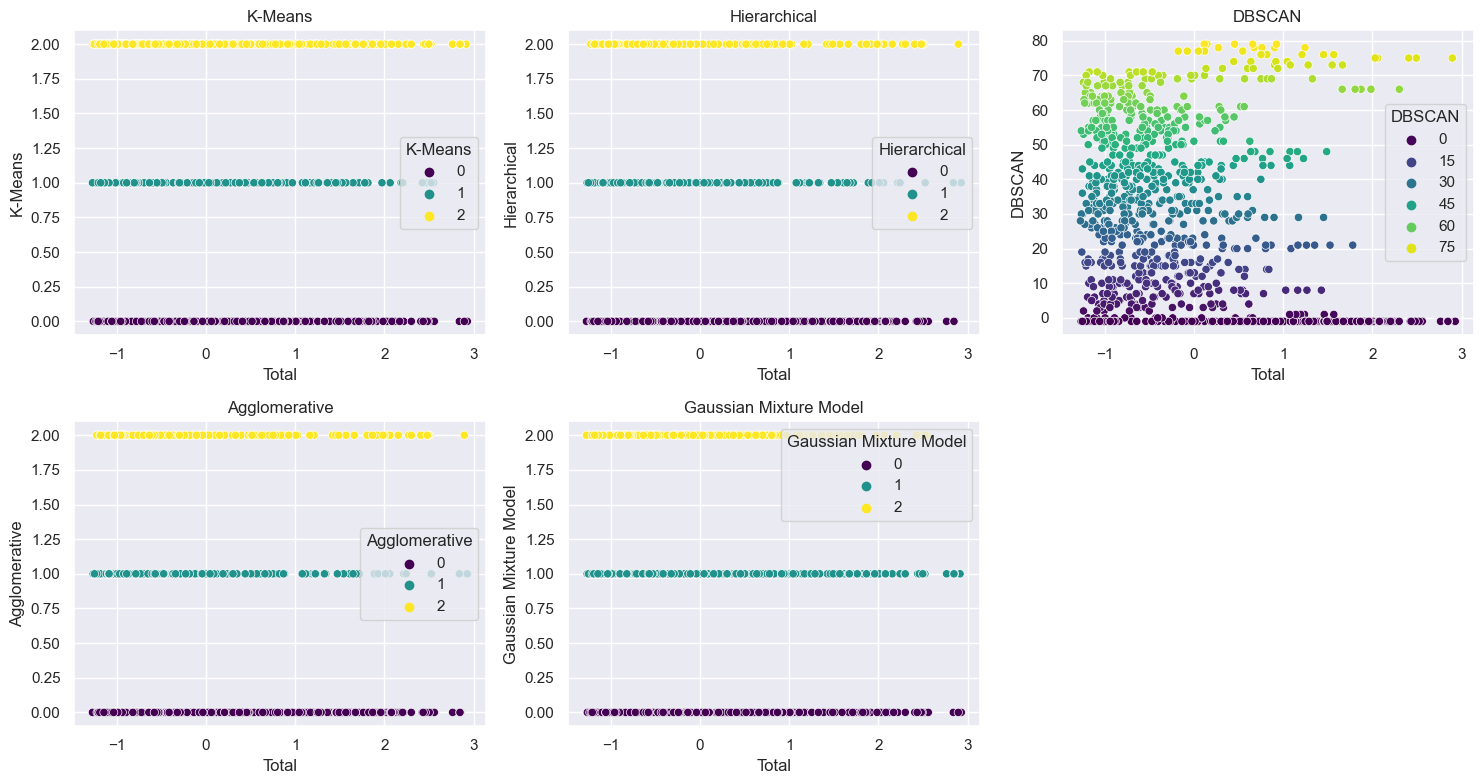

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Load your dataset (replace 'your_dataset.csv' with your actual file)
# df = pd.read_csv('your_dataset.csv')

# Extract relevant features
customer_data = data[['City', 'Customer type', 'Gender', 'Product line', 'Total']]

# Encode categorical features
customer_data_encoded = pd.get_dummies(customer_data, columns=['City', 'Customer type', 'Gender', 'Product line'])

# Feature scaling
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_encoded)

#eps=0.5 (maximum distance for neighbors), min_samples=5 (minimum number of data points required to form a dense region)
# Apply clustering algorithms
algorithms = {
    'K-Means': KMeans(n_clusters=3),
    'Hierarchical': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'Agglomerative': AgglomerativeClustering(n_clusters=3),
    'Gaussian Mixture Model': GaussianMixture(n_components=3)
}

# Create a DataFrame to store cluster labels
cluster_results = pd.DataFrame(index=customer_data.index)

for name, algorithm in algorithms.items():
    # Fit the algorithm
    if name == 'DBSCAN':
        labels = algorithm.fit_predict(customer_data_scaled)
    else:
        labels = algorithm.fit_predict(customer_data_scaled)
    
    # Store cluster labels in the DataFrame
    cluster_results[name] = labels

# Visualize the results
plt.figure(figsize=(15, 8))
for i, (name, labels) in enumerate(cluster_results.iteritems(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=customer_data, x='Total', y=labels, hue=labels, palette='viridis')
    plt.title(name)

plt.tight_layout()
plt.show()


In [55]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}
for name, labels in cluster_results.iteritems():
    if len(set(labels)) > 1:  # Silhouette score requires at least 2 clusters
        score = silhouette_score(customer_data_scaled, labels)
        silhouette_scores[name] = score

print("Silhouette Scores:")
print(silhouette_scores)


Silhouette Scores:
{'K-Means': 0.1276945344378162, 'Hierarchical': 0.14350390414946712, 'DBSCAN': 0.43945498782986375, 'Agglomerative': 0.14350390414946712, 'Gaussian Mixture Model': 0.1276945344378162}


## Classification

Encoding Approach:
0  ==>  0
1  ==>  1
X_train: (850, 22)
y_train: (850,)
X_test: (150, 22)
y_test: (150,)
*************************************************************************
SVC Accuracy Score = 0.49333333333333335
Confusion Matrix and Classification Report for SVC() Classifier
[[24 54]
 [22 50]]
              precision    recall  f1-score   support

           0       0.52      0.31      0.39        78
           1       0.48      0.69      0.57        72

    accuracy                           0.49       150
   macro avg       0.50      0.50      0.48       150
weighted avg       0.50      0.49      0.47       150

*************************************************************************
DecisionTreeClassifier Accuracy Score = 0.52
Confusion Matrix and Classification Report for DecisionTreeClassifier() Classifier
[[39 39]
 [34 38]]
              precision    recall  f1-score   support

           0       0.53      0.50      0.52        78
           1       0.49      0.53     

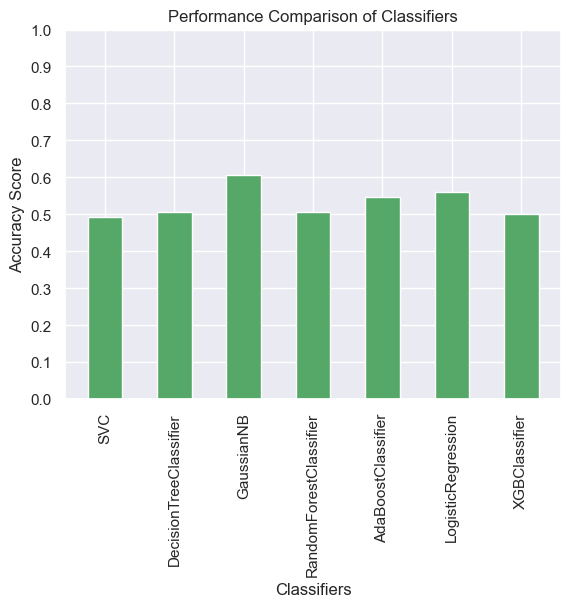

In [56]:

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
df = pd.read_csv('supermarket_sales - Sheet1.csv')

df.drop([ "Date", "Time", "Invoice ID", "City"], axis=1, inplace=True)


# use label encoder for CustomerType
from sklearn.preprocessing import LabelEncoder
# define a function for label encoding
def labelEncoder(labelColumn):
    labelValues = labelColumn
    unique_labels = labelColumn.unique()
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    print('Encoding Approach:')
    for i, j in zip(unique_labels, labelColumn[np.sort(np.unique(labelColumn, return_index=True)[1])]): 
        print(f'{i}  ==>  {j}')
    return labelColumn
data["Customer type"] = labelEncoder(data["Customer type"])

# Function to label encode a column
def labelEncoder(labelColumn):
    le = LabelEncoder()
    labelColumn = le.fit_transform(labelColumn)
    return labelColumn

# Update 'Customer type' encoding
df["Customer type"] = labelEncoder(df["Customer type"])

# for other categorical variables use OneHotEncoder
data = pd.get_dummies(df, columns=['Branch', "Gender", "Product line", "Payment"])
data.head(3)

# create input and output
X = data.drop('Customer type', axis = 1)
y = data['Customer type']



# for train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=128)

# see train and test dataset shape
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

def allClassifiers(X_train, X_test, y_train, y_test):

    
    
    classifiers = [SVC(), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(), AdaBoostClassifier(),
                   LogisticRegression(), XGBClassifier()]
    accuracy_score_dict = {}
    acc_scores = []
    
    
    # function for accuracy score
    def accScore(classifier):

        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test, pred)
        return acc_score
    

    # function for confusion matrix and classification report
    def confusionandReport(classifier):

        
        clf = classifier.fit(X_train, y_train)
        pred = clf.predict(X_test)
        print(f"Confusion Matrix and Classification Report for {classifier} Classifier")
        print(confusion_matrix(y_test, pred))
        print(classification_report(y_test, pred))


    # accuracy score, confusion matrix and classification report for each classifier 
    for classifier in classifiers:
        name = classifier.__class__.__name__
        accuracy_score_dict[name] = accScore(classifier)
        acc_scores.append(accScore(classifier))
        print("*************************************************************************")
        print(f"{name} Accuracy Score = {accuracy_score_dict[name]}")
        confusionandReport(classifier)
        

    #Plotting the performance of Classifiers
    def plotPerformance(scores_list, scores_dict):
        
        N = len(classifiers)
        w = 0.5
        x = np.arange(N)
        plt.bar(x, scores_list, width = w, align = 'center', color="g")
        plt.xlabel("Classifiers")
        plt.title("Performance Comparison of Classifiers")
        plt.ylabel("Accuracy Score")
        plt.xticks(x,
                   scores_dict.keys(),
                   rotation=90)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.show()
    
    # call the function
    plotPerformance(acc_scores, accuracy_score_dict)
allClassifiers(X_train, X_test, y_train, y_test)

 ### Regression

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.462e+31
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:55:53   Log-Likelihood:                 22060.
No. Observations:                 800   AIC:                        -4.409e+04
Df Residuals:                     786   BIC:                        -4.403e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Un

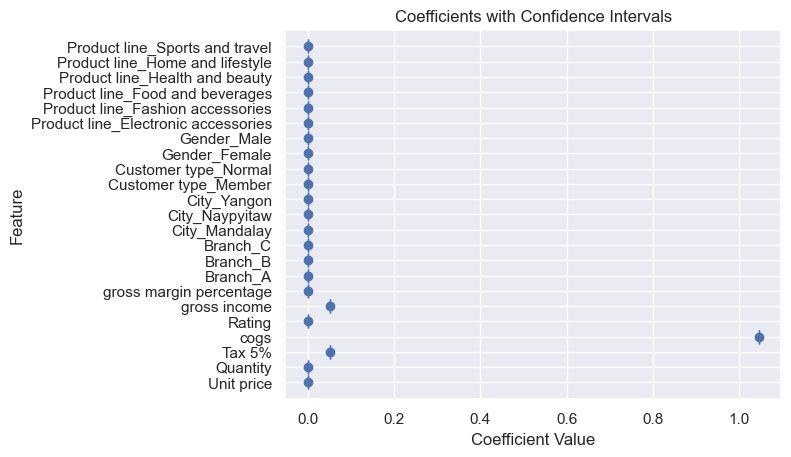

In [57]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
#Ordinary Least square method
df = pd.read_csv('supermarket_sales - Sheet1.csv')
features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 'Rating', 'gross income', 'gross margin percentage']
target = 'Total'  

# Extract features and target variable
X = df[features]
y = df[target]

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Convert non-numeric data to numeric
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Train a regression model
X_train = sm.add_constant(X_train)  # Add a constant term
model = sm.OLS(y_train, X_train)
model_result = model.fit()

# Display model summary
print(model_result.summary())

# Plot coefficients with confidence intervals
coef_names = model_result.params.index
coefficients = model_result.params.values
conf_int = model_result.conf_int().values

plt.errorbar(coefficients, coef_names, xerr=[coefficients - conf_int[:, 0], conf_int[:, 1] - coefficients], fmt='o', linestyle='None', capsize=5)
plt.title('Coefficients with Confidence Intervals')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()



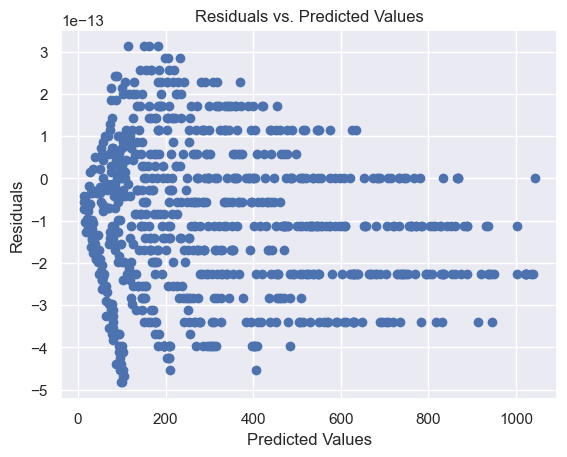

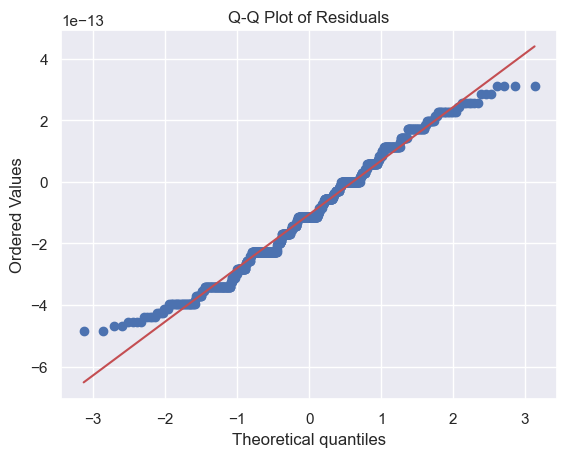

Goldfeld-Quandt Test Statistic: 1.0652958240626655
p-value: 0.26733155903320416


In [59]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import probplot
from statsmodels.stats.diagnostic import het_goldfeldquandt


features = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'cogs', 'Rating', 'gross income', 'gross margin percentage']
target = 'Total'

# Extract features and target variable
X = df[features]
y = df[target]

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Convert non-numeric data to numeric
X_train = X_train.astype(float)
y_train = y_train.astype(float)

# Train a regression model
X_train = sm.add_constant(X_train)  # Add a constant term
model = sm.OLS(y_train, X_train)
model_result = model.fit()

# Get residuals
residuals = model_result.resid

# Plot residuals vs. predicted values to check linearity
plt.scatter(model_result.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Check normality of residuals using Q-Q plot
probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Check for homoscedasticity using Goldfeld-Quandt test
gq_stat, gq_p_value, _ = het_goldfeldquandt(residuals, X_train)
print(f'Goldfeld-Quandt Test Statistic: {gq_stat}')
print(f'p-value: {gq_p_value}')




#### Since the points are randomly scattered around the horizontal axis, we have verified assumptions of normality, linearity, and homoscedasticity.

## Outlier Detection and Statistical Validation

In [37]:
num_col = data.select_dtypes(include=np.number).columns.tolist()
for i in ['Day','Year', 'Month']:
    num_col.remove(i)

print("\nNumerical Variables:\n")
print(num_col,'\n')


Numerical Variables:

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'] 



Branch
Skew: 0.02
Kurtosis: -1.5


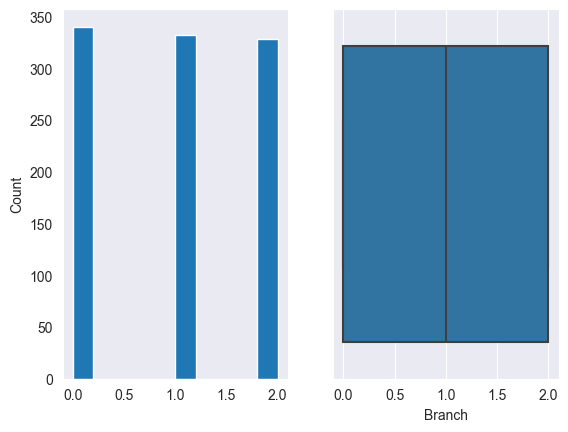

City
Skew: -0.01
Kurtosis: -1.51


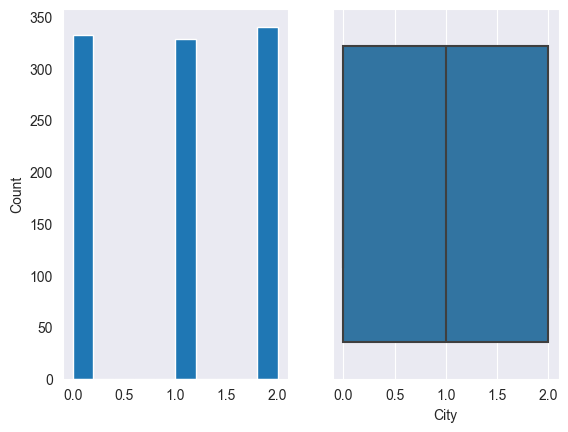

Customer type
Skew: 0.0
Kurtosis: -2.0


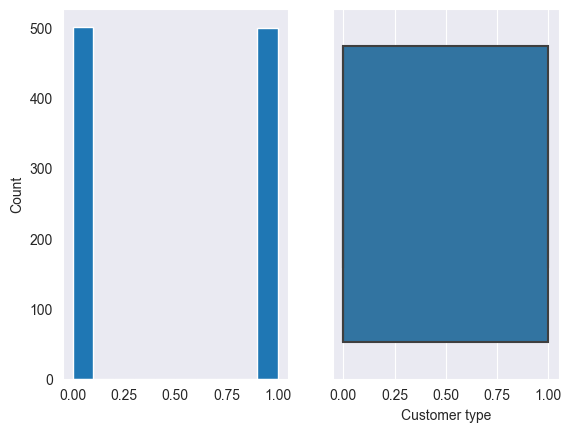

Gender
Skew: 0.0
Kurtosis: -2.0


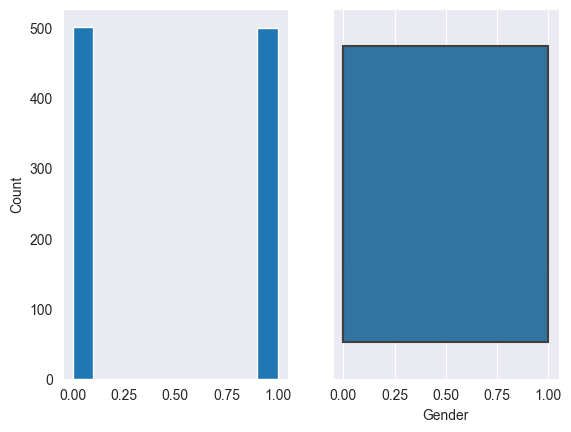

Product line
Skew: 0.06
Kurtosis: -1.28


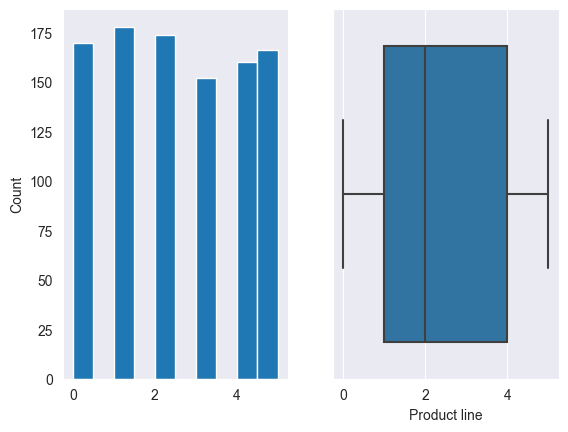

Unit price
Skew: 0.01
Kurtosis: -1.22


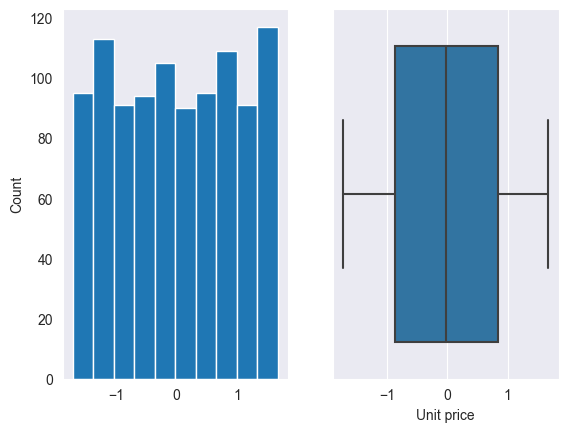

Quantity
Skew: 0.01
Kurtosis: -1.22


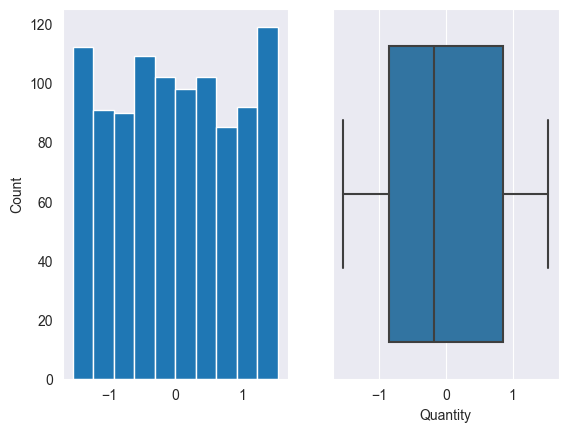

Tax 5%
Skew: 0.89
Kurtosis: -0.08


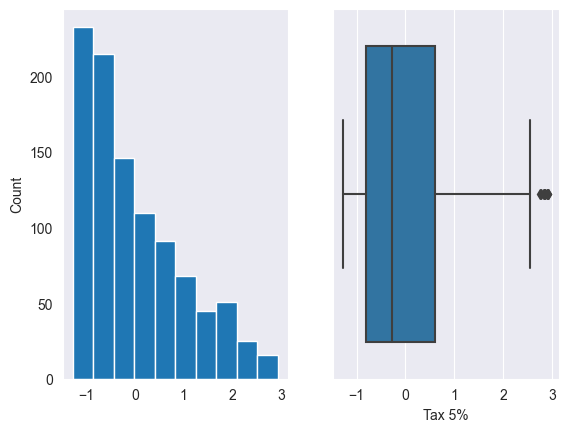

Total
Skew: 0.89
Kurtosis: -0.08


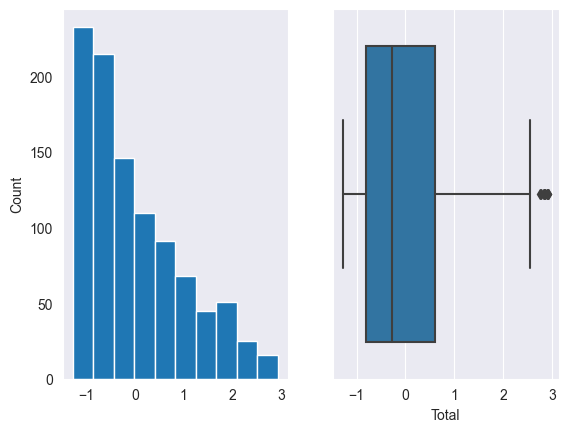

Payment
Skew: -0.0
Kurtosis: -1.55


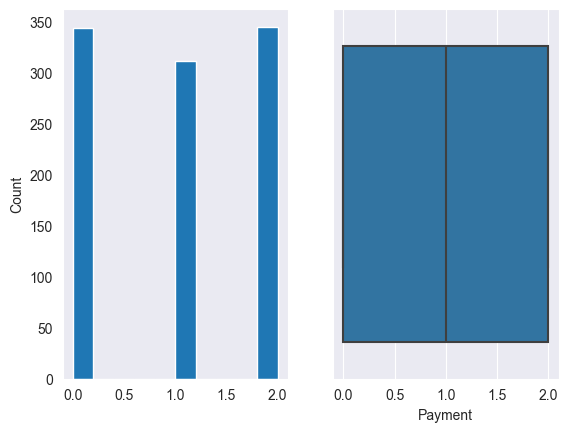

cogs
Skew: 0.89
Kurtosis: -0.08


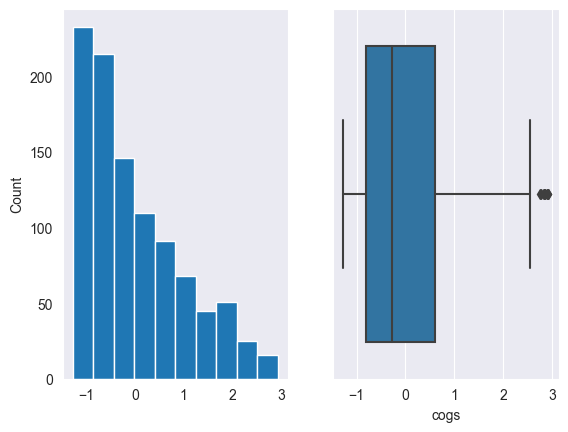

gross margin percentage
Skew: 0
Kurtosis: 0


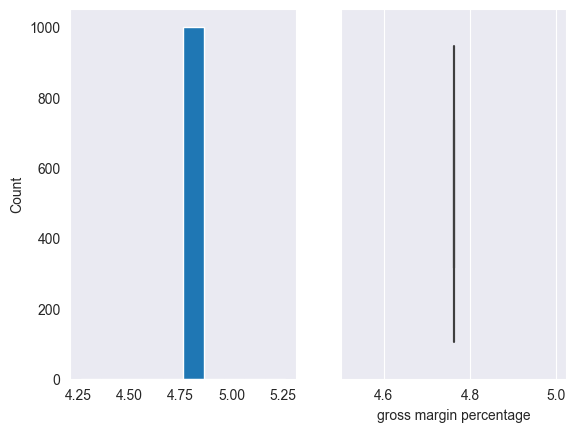

gross income
Skew: 0.89
Kurtosis: -0.08


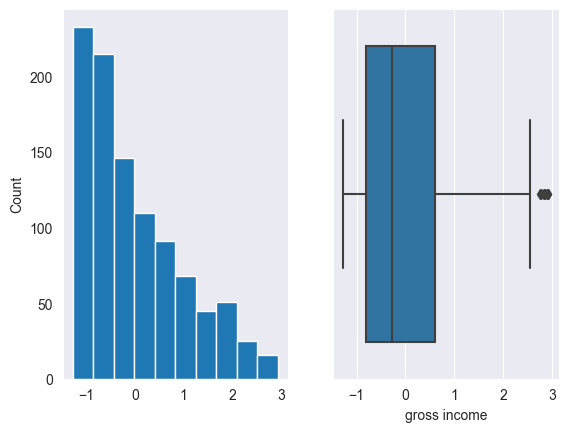

Rating
Skew: 0.01
Kurtosis: -1.15


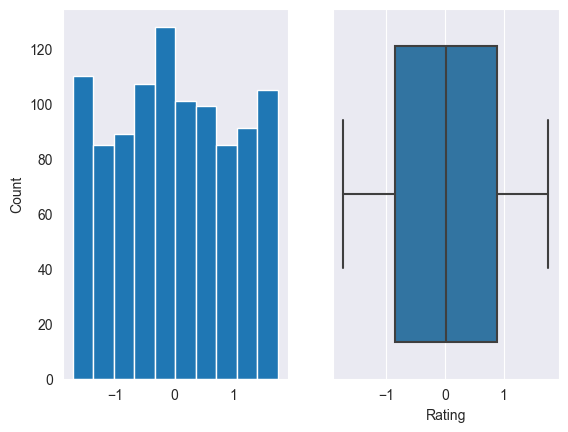

In [38]:
for col in num_col:
    print(col)
    #A histogram and box plot is used to show the pattern of the variables,skewness and outliers.
    print('Skew:',round(data[col].skew(),2))
    print('Kurtosis:',round(data[col].kurtosis(),2))
    plt.subplot(1,2,1)
    data[col].hist(grid=False)
    plt.ylabel('Count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

In [39]:
# Trimming Outliers Using IQR Ranges.
print("\nOld shape Of dataSet Is:\n",data.shape)
q3 = data['gross income'].quantile(0.75)
q1 = data['gross income'].quantile(.25)
IQR = q3-q1
lower_limit = q1-(IQR*1.5)
upper_limit = q3+(IQR*1.5)
# Removing Outlier Rows From Our Originoal DataSet.
income_outlier = np.where(data['gross income']>upper_limit,True,np.where(data['gross income']<lower_limit,True,False))
data = data.loc[~(income_outlier)]
print("\nNew shape Of dataSet Is:\n",data.shape)


Old shape Of dataSet Is:
 (1000, 20)

New shape Of dataSet Is:
 (991, 20)


<Axes: >

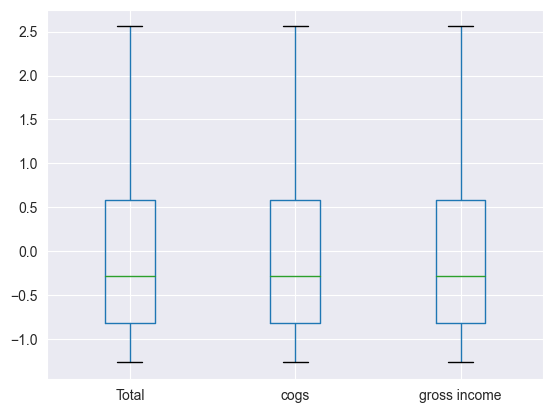

In [40]:
# Visualization to check filtered data.
data[['Total','cogs','gross income']].boxplot()

T-Statistic: -0.8419943336454808
P-Value: 0.39999284390014656
Fail to reject the null hypothesis. There is no significant difference in Rating for outliers.


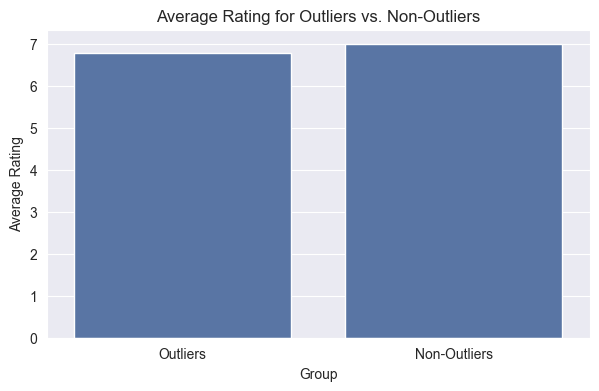

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, ttest_ind

# Assuming 'Total' is a relevant feature for outlier detection
total_column = 'Total'

# 1. Identify and Analyze Outliers
# Using Z-score to identify outliers
z_scores = zscore(data[total_column])
outliers = (z_scores > 2) | (z_scores < -2)

    
# Extract outlier rows
outlier_df = data[outliers]



# 3. Apply Relevant Statistical Tests
# In this example, let's test if the average 'Rating' for outliers is significantly different from the rest
rating_column = 'Rating'
# Separate data into two groups: outliers and non-outliers
group_outliers = data[data.index.isin(outlier_df.index)][rating_column]
group_non_outliers = data[~data.index.isin(outlier_df.index)][rating_column]


# Calculate average ratings for outliers and non-outliers
average_rating_outliers = group_outliers.mean()
average_rating_non_outliers = group_non_outliers.mean()

# Perform t-test
t_statistic, p_value = ttest_ind(group_outliers, group_non_outliers)

# Display results
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in Rating for outliers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Rating for outliers.")

# Plot average ratings for both groups
plt.figure(figsize=(7, 4))
sns.barplot(x=['Outliers', 'Non-Outliers'], y=[average_rating_outliers, average_rating_non_outliers], color='#4C72B0')
plt.title('Average Rating for Outliers vs. Non-Outliers')
plt.xlabel('Group')
plt.ylabel('Average Rating')
plt.show()


T-Statistic: 0.6215268724928228
P-Value: 0.5343949596143621


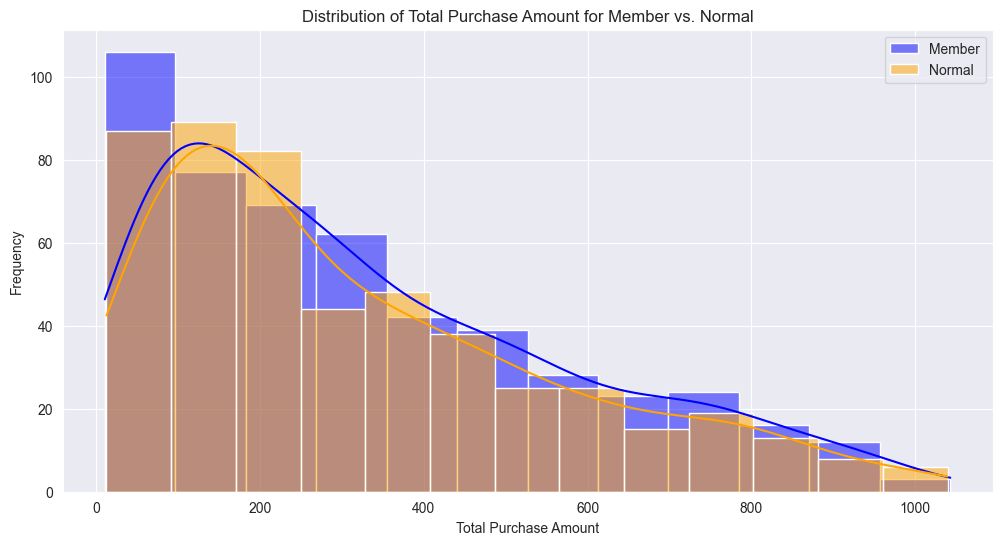

Fail to reject the null hypothesis. There is no significant difference in total purchase amount for Member vs. Normal customer types.


In [42]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Assuming 'Total' is a relevant feature for analysis
total_column = 'Total'
customer_type_column = 'Customer type'

# Drop rows with missing values in the 'Total' column
data = df.dropna(subset=[total_column])

# Check if there are entries with 'Member' and 'Normal' in the 'Customer type' column
if 'Member' in df[customer_type_column].values and 'Normal' in df[customer_type_column].values:
    # Separate data into two groups: Member and Normal
    group_member = df[df[customer_type_column] == 'Member'][total_column]
    group_normal = df[df[customer_type_column] == 'Normal'][total_column]

    # Check if there are non-empty groups for the t-test
    if len(group_member) > 0 and len(group_normal) > 0:
        # Perform t-test
        t_statistic, p_value = ttest_ind(group_member, group_normal)

        # Display results
        print(f"T-Statistic: {t_statistic}")
        print(f"P-Value: {p_value}")

        # Plot distribution of both groups
        plt.figure(figsize=(12, 6))
        sns.histplot(group_member, label='Member', kde=True, color='blue')
        sns.histplot(group_normal, label='Normal', kde=True, color='orange')
        plt.title('Distribution of Total Purchase Amount for Member vs. Normal')
        plt.xlabel('Total Purchase Amount')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

        # Interpret the results
        if p_value < 0.05:
            print("Reject the null hypothesis. There is a significant difference in total purchase amount for Member vs. Normal customer types.")
        else:
            print("Fail to reject the null hypothesis. There is no significant difference in total purchase amount for Member vs. Normal customer types.")
    else:
        print("Error: One or both groups have no data after removing missing values.")
else:
    print("Error: Data does not contain both 'Member' and 'Normal' in the 'Customer type' column.")

#### I applied T-test to analyze the significance of each hypothesis and it is clear from above results that There is no significant difference in total purchase amount for Member vs. Normal customer types.

#### Also, There is no significant difference in Rating for outliers.